In [ ]:
%pip install -U fastai kaggle

In [ ]:
%pip install torch==2.1.2 fastai --upgrade --quiet


In [ ]:
from fastai.vision.all import *
import zipfile
import shutil

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marshmelloiw","key":"68116a1797f4ef11b538370b7c4b8364"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shahriar26s/flower-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/shahriar26s/flower-classification-dataset
License(s): apache-2.0
  0% 0.00/79.1M [00:00<?, ?B/s]
100% 79.1M/79.1M [00:00<00:00, 897MB/s]


In [ ]:
with zipfile.ZipFile("flower-classification-dataset.zip","r") as zip_ref:
    zip_ref.extractall("flower_data")

In [ ]:
path = Path("flower_data")
path.ls()

(#1) [Path('flower_data/Flower Classification Dataset')]

In [ ]:
(path/"Flower Classification Dataset").ls()

(#3) [Path('flower_data/Flower Classification Dataset/test'),Path('flower_data/Flower Classification Dataset/train'),Path('flower_data/Flower Classification Dataset/valid')]

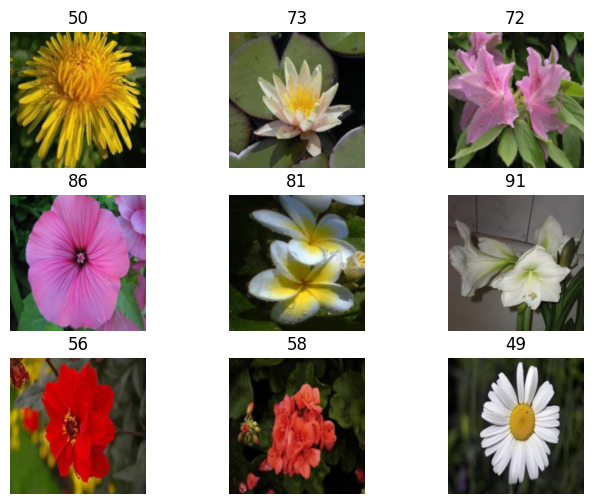

In [ ]:
flower_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'),
    item_tfms=Resize(256),
    batch_tfms=aug_transforms(size=224)
)

dls = flower_block.dataloaders(path, bs=32)
dls.show_batch(max_n=9, figsize=(8,6))

In [ ]:
print("Classes:", dls.vocab)
print("Number of flower classes:", len(dls.vocab))

Classes: ['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
Number of flower classes: 102


In [ ]:
flower_block.summary(path)

Setting-up type transforms pipelines
Found 8189 items
2 datasets of sizes 4102,2045
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}


Building one sample
  Pipeline: PILBase.create
    starting from
      flower_data/Flower Classification Dataset/train/85/image_04811_jpg.rf.ee75226befe395db49f23b59361ff4af.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=224x224
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

    starting from
      flower_data/Flower Classification Dataset/train/85/image_04811_jpg.rf.ee75226befe395db49f23b59361ff4af.jpg
    applying parent_label gives
      85
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
 gives
      TensorCategory(86)

Final sample: (PILImage mode=RGB size=224x224, TensorCategory(86))


Found 8189 items
2 datasets of sizes 4102,2045
Setting up Pipeline: PILBase.create
Setting up

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 178MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,3.029171,1.050160,0.737897,00:25


epoch,train_loss,valid_loss,accuracy,time
0,1.030851,0.514292,0.871883,00:29
1,0.538858,0.301571,0.921271,00:30
2,0.272817,0.236766,0.937408,00:30
3,0.138101,0.198280,0.950611,00:30
4,0.090304,0.188973,0.953056,00:30


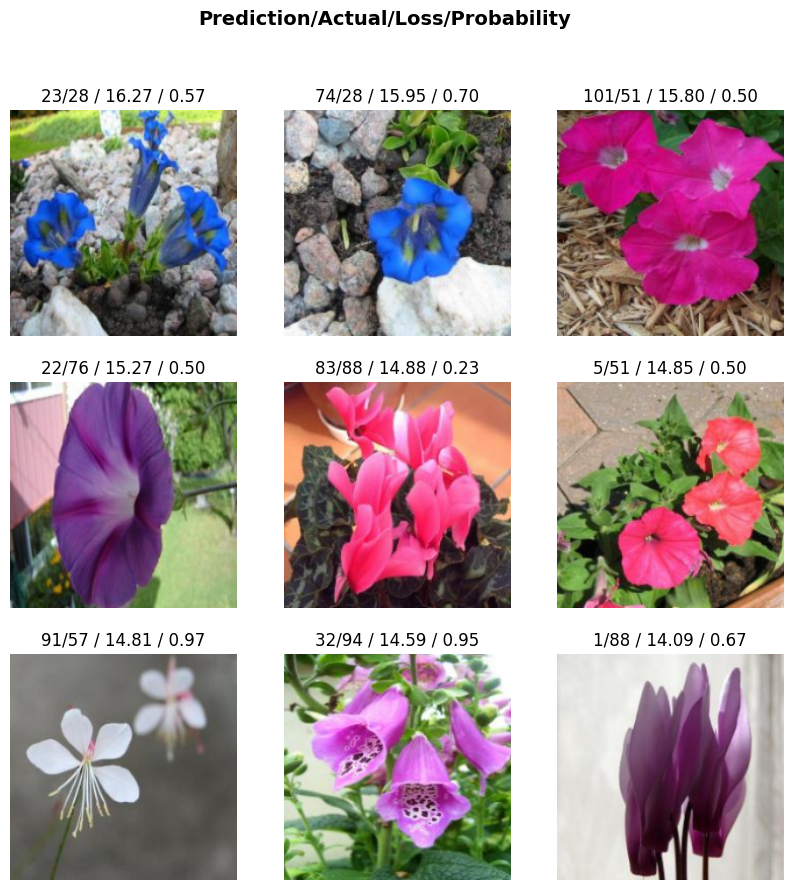

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, nrows=3, figsize=(10,10))

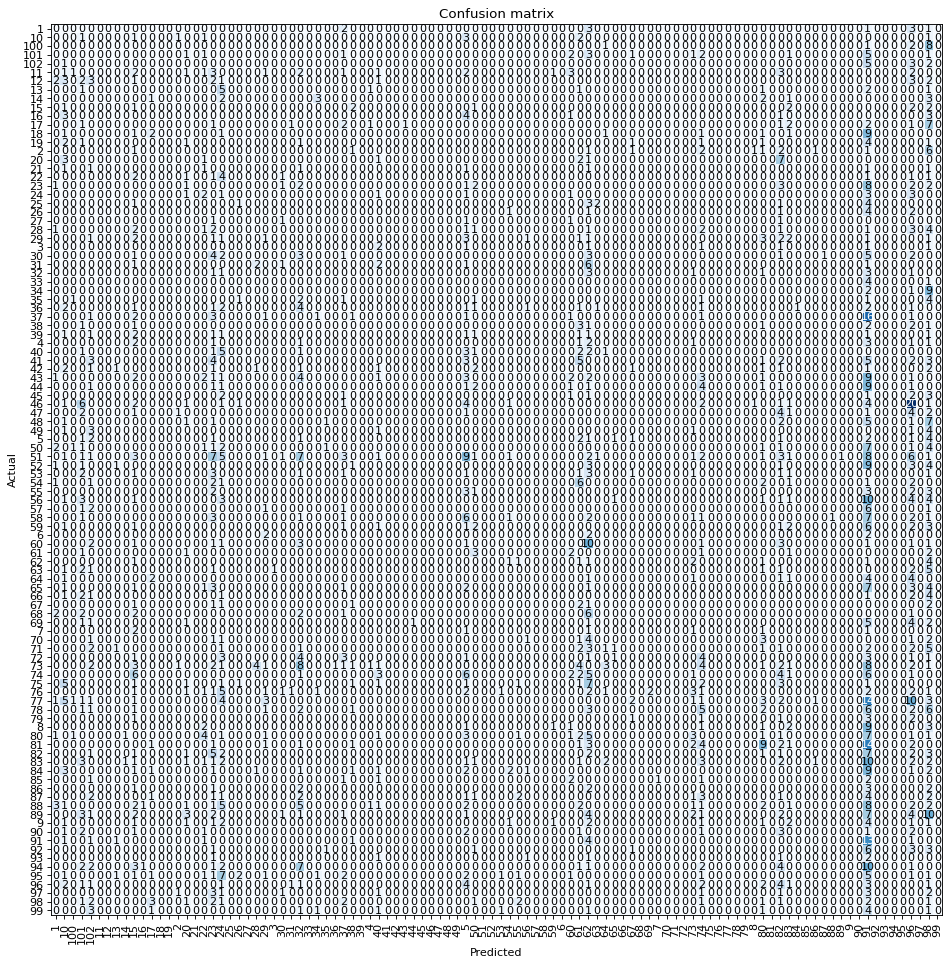

In [ ]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=80)

SuggestedLRs(valley=1.2022644114040304e-05)

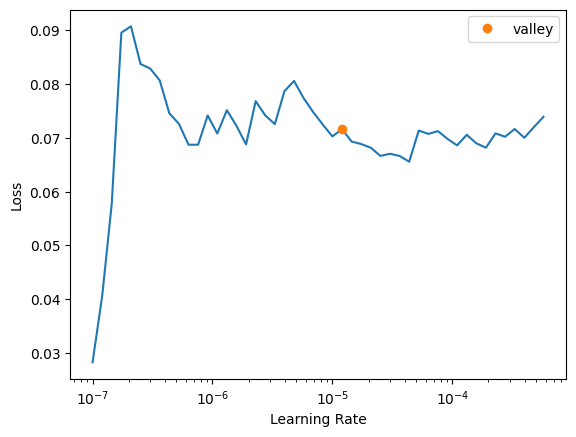

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(1, base_lr=1.2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,6.412414,5.119080,0.015159,00:39


epoch,train_loss,valid_loss,accuracy,time
0,6.190917,5.025591,0.022005,00:49


In [ ]:
learn.fine_tune(1, base_lr=2*1.2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,6.008189,4.690523,0.046455,00:40


epoch,train_loss,valid_loss,accuracy,time
0,5.647095,4.510841,0.067482,00:51


In [ ]:
learn.fine_tune(1, base_lr=4*1.2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,5.314780,3.940077,0.165281,00:40


epoch,train_loss,valid_loss,accuracy,time
0,4.803588,3.668898,0.213203,00:50


In [ ]:
learn.fine_tune(1, base_lr=8*1.2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,4.186694,2.882143,0.369193,00:40


epoch,train_loss,valid_loss,accuracy,time
0,3.521473,2.586932,0.430807,00:50


In [ ]:
learn.fine_tune(1, base_lr=16*1.2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,2.924909,1.886670,0.574083,00:42


epoch,train_loss,valid_loss,accuracy,time
0,2.229800,1.555842,0.651834,00:50


In [ ]:
learn.fine_tune(1, base_lr=32*1.2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,1.801947,1.026395,0.753545,00:41


epoch,train_loss,valid_loss,accuracy,time
0,1.174906,0.781436,0.821516,00:55


In [ ]:
learn.fine_tune(1, base_lr=64*1.2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,1.001007,0.576294,0.854768,00:42


epoch,train_loss,valid_loss,accuracy,time
0,0.632777,0.415934,0.900733,00:50


In [ ]:
learn.fine_tune(1, base_lr=128*1.2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.618313,0.452978,0.874328,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.361012,0.294892,0.917848,00:51


In [ ]:
learn.fine_tune(1, base_lr=256*1.2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.480579,0.459668,0.866015,00:41


epoch,train_loss,valid_loss,accuracy,time
0,0.280009,0.238624,0.941320,00:50


In [ ]:
learn.fine_tune(1, base_lr=512*1.2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.539409,0.661941,0.841076,00:41


epoch,train_loss,valid_loss,accuracy,time
0,0.338399,0.253734,0.933007,00:50


In [ ]:
learn.fine_tune(1, base_lr=1024*1.2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.645860,0.848259,0.843521,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.767685,0.446977,0.903179,00:49


In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(3, base_lr=256*1.2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,2.638576,0.846697,0.777017,00:24


epoch,train_loss,valid_loss,accuracy,time
0,0.828646,0.545771,0.843521,00:29
1,0.432304,0.283860,0.921760,00:29
2,0.184599,0.210481,0.942787,00:31


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, lr_max=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.166755,0.359809,0.906112,00:29
1,0.148680,0.208079,0.943765,00:30
2,0.072964,0.181274,0.949144,00:30


In [ ]:
learn.export("flower_classifier.pkl")